## Import librerias y dataset:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
#Dataset original:
df = pd.read_csv("Life Expectancy Data Europe Recodificado.csv")
df.dropna(axis='rows', how='all', inplace=True) # Borra las filas que tengan todos los valores faltantes
df

Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0    Austria  2000       0             78.1               94    13.20   
1    Austria  2001       0             78.6               90    12.40   
2    Austria  2002       0             78.7               87    12.50   
3    Austria  2003       0             78.8               86    12.20   
4    Austria  2004       0             79.3               84    12.10   
..       ...   ...     ...              ...              ...      ...   
411   Sweden  2011       0             81.7               58     7.40   
412   Sweden  2012       0             81.7               56     7.40   
413   Sweden  2013       0             81.9               56     7.30   
414   Sweden  2014       0             82.3               55     7.30   
415   Sweden  2015       0             82.4               54     7.13   

     Total expenditure   BMI  Under-five deaths  Percentage expenditure  \
0              2269.13  51.0                  0                    1.60   
1              2282.52  56.0                  0                    1.12   
2              2497.87  51.2                  0                    1.27   
3              3091.24  51.7                  0                    1.48   
4              3594.65  52.2                  0                    1.56   
..                 ...   ...                ...                     ...   
411            6351.22  57.7                  0                   11.70   
412            6254.44  58.1                  0                   11.80   
413            6696.87  58.5                  0                   11.97   
414            6605.91  59.0                  0                   11.93   
415            5598.68  59.5                  0                   10.80   

             GDP  Population  Thinness 1-19 years  Thinness 5-9 years  \
0    24517.26745      811566                  1.7                 1.9   
1    24489.73553      842293                  1.7                 1.9   
2    26351.37568      881957                  1.7                 1.9   
3     3212.93550     8121423                  1.7                 1.9   
4    36693.42620     8171966                  1.7                 1.9   
..           ...         ...                  ...                 ...   
411  59593.28711     9449213                  1.4                 1.3   
412  57134.77700     9519374                  1.4                 1.3   
413   6283.24522       96379                  1.4                 1.3   
414   5918.19898      969611                  1.5                 1.3   
415   5585.25847     9799186                  1.5                 1.4   

     Income composition of resources  Schooling  Average temperature  \
0                              0.833       15.4                 7.99   
1                              0.837       15.5                 7.04   
2                              0.847       16.1                 7.74   
3                              0.837       14.7                 7.37   
4                              0.841       14.7                 6.77   
..                               ...        ...                  ...   
411                            0.901       16.0                 4.01   
412                            0.903       15.8                 2.54   
413                            0.904       15.8                 3.37   
414                            0.906       15.8                 4.23   
415                            0.909       15.9                 3.97   

     CO2 Emissions  Cholesterol  Smoking  
0              7.9          3.9     52.3  
1              8.4          3.9      NaN  
2              8.6          3.9      NaN  
3              9.2          3.8      NaN  
4              9.3          3.8      NaN  
..             ...          ...      ...  
411            4.7          3.3      NaN  
412            4.4          3.3      NaN  
413            4.2          3.3      NaN  
414            4.0          3.3      NaN  
415         

## Aproximando Smoking con interpolacion:

In [31]:
df_Smoking = df.interpolate(method='polynomial', order=2)
df_Smoking

Country  Year  Status  Life expectancy  Adult Mortality  Alcohol  \
0    Austria  2000       0             78.1               94    13.20   
1    Austria  2001       0             78.6               90    12.40   
2    Austria  2002       0             78.7               87    12.50   
3    Austria  2003       0             78.8               86    12.20   
4    Austria  2004       0             79.3               84    12.10   
..       ...   ...     ...              ...              ...      ...   
411   Sweden  2011       0             81.7               58     7.40   
412   Sweden  2012       0             81.7               56     7.40   
413   Sweden  2013       0             81.9               56     7.30   
414   Sweden  2014       0             82.3               55     7.30   
415   Sweden  2015       0             82.4               54     7.13   

     Total expenditure   BMI  Under-five deaths  Percentage expenditure  \
0              2269.13  51.0                  0                    1.60   
1              2282.52  56.0                  0                    1.12   
2              2497.87  51.2                  0                    1.27   
3              3091.24  51.7                  0                    1.48   
4              3594.65  52.2                  0                    1.56   
..                 ...   ...                ...                     ...   
411            6351.22  57.7                  0                   11.70   
412            6254.44  58.1                  0                   11.80   
413            6696.87  58.5                  0                   11.97   
414            6605.91  59.0                  0                   11.93   
415            5598.68  59.5                  0                   10.80   

             GDP  Population  Thinness 1-19 years  Thinness 5-9 years  \
0    24517.26745      811566                  1.7                 1.9   
1    24489.73553      842293                  1.7                 1.9   
2    26351.37568      881957                  1.7                 1.9   
3     3212.93550     8121423                  1.7                 1.9   
4    36693.42620     8171966                  1.7                 1.9   
..           ...         ...                  ...                 ...   
411  59593.28711     9449213                  1.4                 1.3   
412  57134.77700     9519374                  1.4                 1.3   
413   6283.24522       96379                  1.4                 1.3   
414   5918.19898      969611                  1.5                 1.3   
415   5585.25847     9799186                  1.5                 1.4   

     Income composition of resources  Schooling  Average temperature  \
0                              0.833       15.4                 7.99   
1                              0.837       15.5                 7.04   
2                              0.847       16.1                 7.74   
3                              0.837       14.7                 7.37   
4                              0.841       14.7                 6.77   
..                               ...        ...                  ...   
411                            0.901       16.0                 4.01   
412                            0.903       15.8                 2.54   
413                            0.904       15.8                 3.37   
414                            0.906       15.8                 4.23   
415                            0.909       15.9                 3.97   

     CO2 Emissions  Cholesterol    Smoking  
0              7.9          3.9  52.300000  
1              8.4          3.9  50.363153  
2              8.6          3.9  48.544729  
3              9.2          3.8  46.844729  
4              9.3          3.8  45.263153  
..             ...          ...        ...  
411            4.7          3.3  31.720217  
412            4.4          3.3  30.990325  
413            4.2          3.3  30.110325  
414            4.0          3.3  29

## Regresion lineal multiple para cada pais:

In [32]:
Paises_set = set(df_Smoking['Country'])
for country in Paises_set:
    pais = df_Smoking.loc[df['Country'] == country]
    pais = pais.drop('Country', axis=1)
    X = pais.drop('Life expectancy',axis= 1) 
    y = pais['Life expectancy']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{country}:')
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error:", mse)
    
    r2_score = model.score(X, y)
    print(f"R-squared value: {r2_score}")

    print("Intercept:", model.intercept_)
    for i in range(len(model.coef_)):
        pais_drop = pais.drop('Life expectancy', axis=1)
        print(f'{model.coef_[i]:.2f} : {pais_drop.columns[i]}')
    print('\n')

Spain:
Mean Squared Error: 17.199704333204664
R-squared value: 0.4116459139340448
Intercept: 339.3291778841553
-0.10 : Year
0.00 : Status
-1.23 : Adult Mortality
1.58 : Alcohol
-0.00 : Total expenditure
-0.58 : BMI
1.27 : Under-five deaths
0.76 : Percentage expenditure
-0.00 : GDP
-0.00 : Population
-0.00 : Thinness 1-19 years
0.00 : Thinness 5-9 years
0.00 : Income composition of resources
-3.25 : Schooling
4.94 : Average temperature
5.13 : CO2 Emissions
0.85 : Cholesterol
-0.03 : Smoking


Hungary:
Mean Squared Error: 0.08383087472430285
R-squared value: 0.986698790206378
Intercept: 367.27082075910687
-0.15 : Year
0.00 : Status
-0.05 : Adult Mortality
0.30 : Alcohol
0.00 : Total expenditure
0.29 : BMI
-0.06 : Under-five deaths
-0.52 : Percentage expenditure
0.00 : GDP
-0.00 : Population
0.16 : Thinness 1-19 years
0.16 : Thinness 5-9 years
0.00 : Income composition of resources
0.30 : Schooling
-0.33 : Average temperature
-0.49 : CO2 Emissions
0.08 : Cholesterol
0.08 : Smoking


Luxem

0.00 : Population
0.00 : Thinness 1-19 years
-0.05 : Thinness 5-9 years
-0.02 : Income composition of resources
1.73 : Schooling
-1.58 : Average temperature
-1.63 : CO2 Emissions
-0.06 : Cholesterol
0.71 : Smoking


Greece:
Mean Squared Error: 13.245834234159453
R-squared value: 0.609164745998808
Intercept: 2269.330458513095
-1.13 : Year
-0.00 : Status
0.34 : Adult Mortality
-0.21 : Alcohol
-0.00 : Total expenditure
0.77 : BMI
1.65 : Under-five deaths
3.44 : Percentage expenditure
0.00 : GDP
0.00 : Population
0.00 : Thinness 1-19 years
0.15 : Thinness 5-9 years
-0.02 : Income composition of resources
0.59 : Schooling
0.31 : Average temperature
-4.74 : CO2 Emissions
0.15 : Cholesterol
-0.10 : Smoking


Germany:
Mean Squared Error: 5.389355100602153
R-squared value: 0.874131953042514
Intercept: -1576.733536904426
0.82 : Year
-0.00 : Status
0.36 : Adult Mortality
1.87 : Alcohol
0.00 : Total expenditure
0.04 : BMI
-3.13 : Under-five deaths
-0.16 : Percentage expenditure
-0.00 : GDP
0.00 : 

## Regresion lineal de cada variable para cada pais:

Spain
Schooling:
Slope: 0.66
Intercept: 71.26
Rvalue: 0.18
Pvalue: 0.50
Stderr: 0.96
Regression line: y=71.260.66x, r=0.18


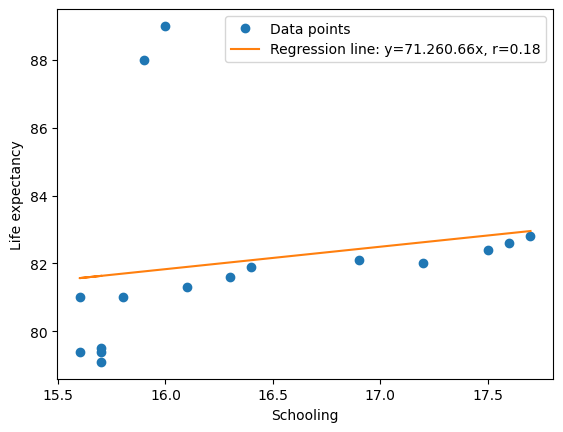

CO2 Emissions:
Slope: 0.11
Intercept: 81.36
Rvalue: 0.04
Pvalue: 0.89
Stderr: 0.73
Regression line: y=81.360.11x, r=0.04


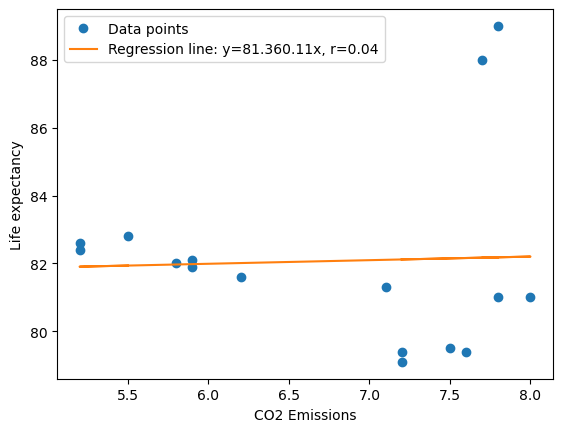

Average temperature:
Slope: 1.09
Intercept: 66.70
Rvalue: 0.13
Pvalue: 0.63
Stderr: 2.21
Regression line: y=66.701.09x, r=0.13


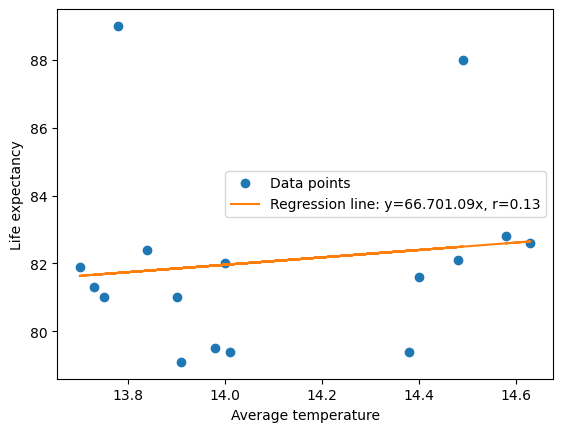

Percentage expenditure:
Slope: 0.92
Intercept: 74.19
Rvalue: 0.28
Pvalue: 0.30
Stderr: 0.85
Regression line: y=74.190.92x, r=0.28


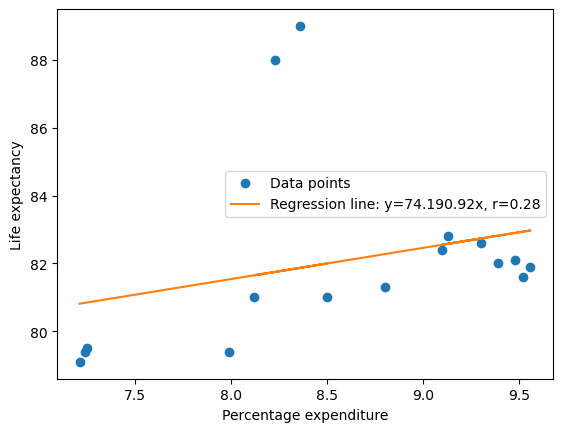

Total expenditure:
Slope: 0.00
Intercept: 77.71
Rvalue: 0.48
Pvalue: 0.06
Stderr: 0.00
Regression line: y=77.710.00x, r=0.48


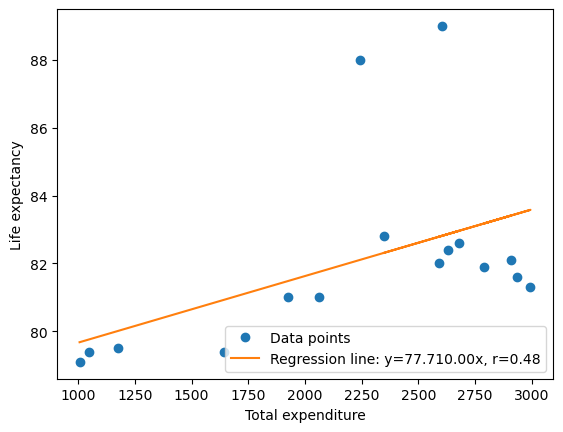

Year:
Slope: 0.20
Intercept: -324.45
Rvalue: 0.35
Pvalue: 0.19
Stderr: 0.15
Regression line: y=-324.450.20x, r=0.35


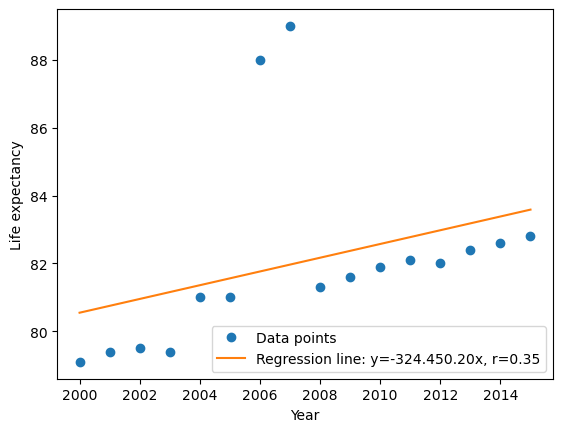

Alcohol:
Slope: -0.06
Intercept: 82.68
Rvalue: -0.03
Pvalue: 0.92
Stderr: 0.59
Regression line: y=82.68-0.06x, r=-0.03


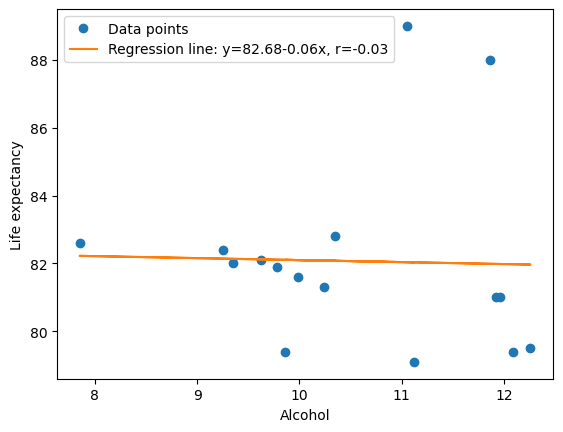

Cholesterol:
Slope: -6.22
Intercept: 103.52
Rvalue: -0.23
Pvalue: 0.39
Stderr: 7.03
Regression line: y=103.52-6.22x, r=-0.23


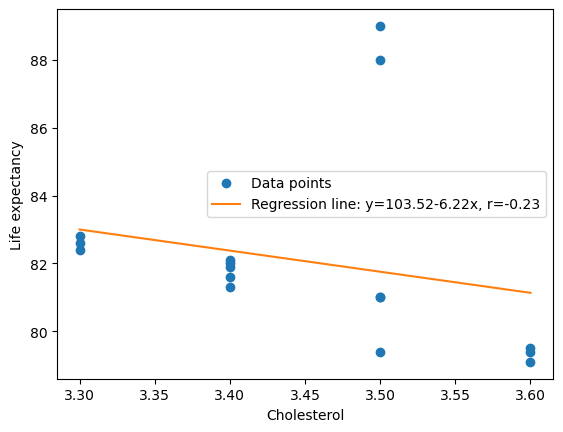

Under-five deaths:
Slope: -0.72
Intercept: 83.42
Rvalue: -0.09
Pvalue: 0.75
Stderr: 2.18
Regression line: y=83.42-0.72x, r=-0.09


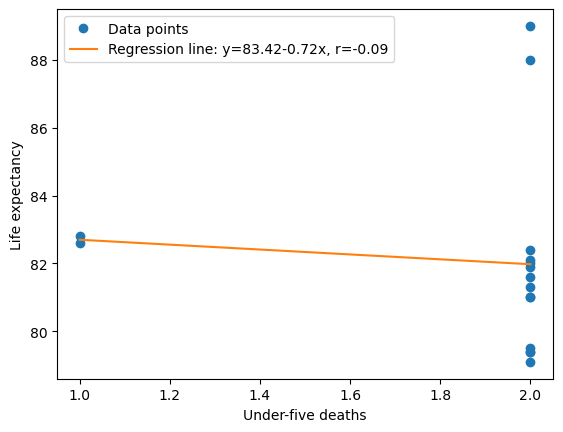

Income composition of resources:
Slope: 47.49
Intercept: 41.68
Rvalue: 0.34
Pvalue: 0.19
Stderr: 34.64
Regression line: y=41.6847.49x, r=0.34


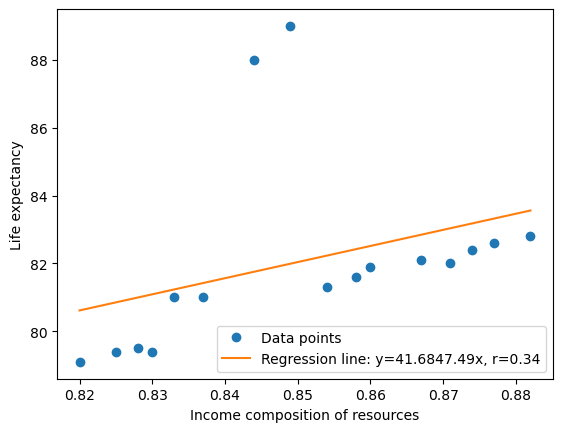

GDP:
Slope: -0.00
Intercept: 82.12
Rvalue: -0.02
Pvalue: 0.96
Stderr: 0.00
Regression line: y=82.12-0.00x, r=-0.02


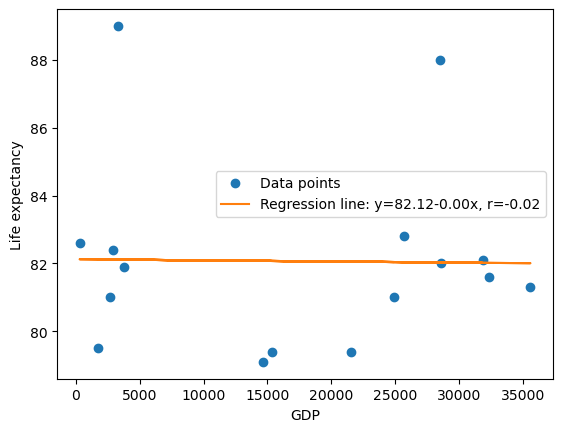

Population:
Slope: -0.00
Intercept: 82.18
Rvalue: -0.03
Pvalue: 0.91
Stderr: 0.00
Regression line: y=82.18-0.00x, r=-0.03


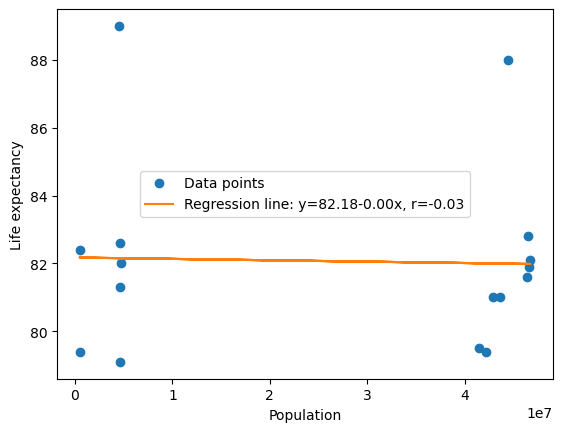

Smoking:
Slope: -0.14
Intercept: 86.85
Rvalue: -0.40
Pvalue: 0.13
Stderr: 0.09
Regression line: y=86.85-0.14x, r=-0.40


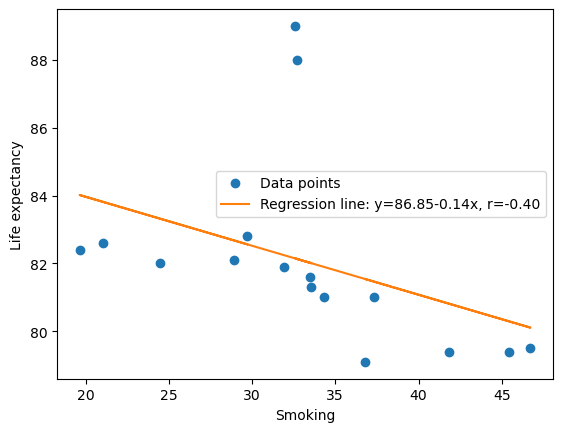

Adult Mortality:
Slope: -0.10
Intercept: 89.40
Rvalue: -0.35
Pvalue: 0.18
Stderr: 0.07
Regression line: y=89.40-0.10x, r=-0.35


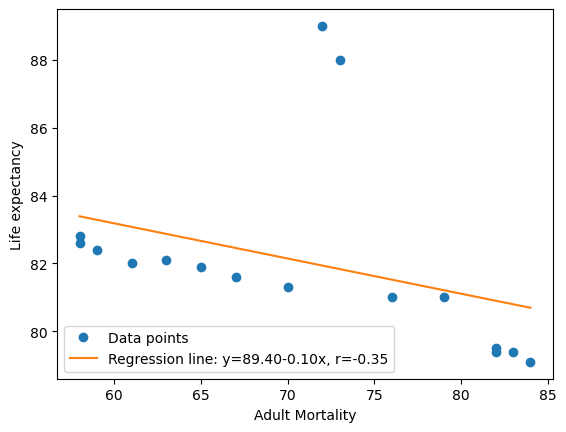

BMI:
Slope: 0.28
Intercept: 64.63
Rvalue: 0.29
Pvalue: 0.27
Stderr: 0.24
Regression line: y=64.630.28x, r=0.29


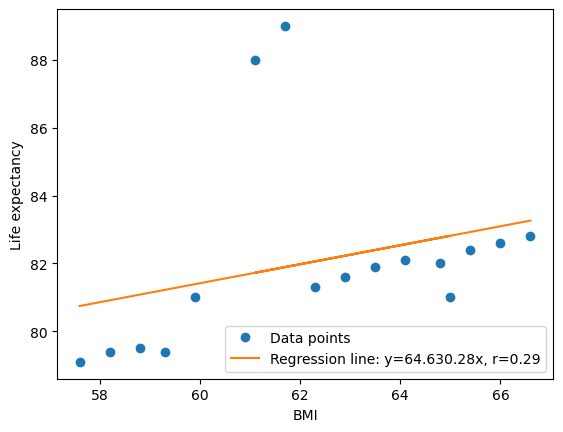

------------------------------------------------------------------- 



In [33]:
Paises_set = set(df_Smoking['Country'])
for country in Paises_set:
    pais = df_Smoking.loc[df_Smoking['Country'] == country]
    pais = pais.drop('Country', axis=1)
    print(country)
    variables_set = set(pais.columns)
    for variable in variables_set:
        if variable == "Life expectancy":
            pass
        else:
            X = pais[variable]
            y = pais['Life expectancy']
            
            if X.nunique() == 1:
                continue
            
            print(f'{variable}:')
            result = scipy.stats.linregress(X, y)
            print(f'Slope: {result.slope:.2f}')
            print(f'Intercept: {result.intercept:.2f}')
            print(f'Rvalue: {result.rvalue:.2f}')
            print(f'Pvalue: {result.pvalue:.2f}')
            print(f'Stderr: {result.stderr:.2f}')

            slope, intercept, r, p, stderr = scipy.stats.linregress(X, y)
            line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'
            print(line)

            fig, ax = plt.subplots()
            ax.plot(X, y, linewidth=0, marker='o', label='Data points')
            ax.plot(X, intercept + slope * X, label=line)
            ax.set_xlabel(variable)
            ax.set_ylabel('Life expectancy')
            ax.legend(facecolor='white')
            plt.show()
    print('------------------------------------------------------------------- \n')
    break

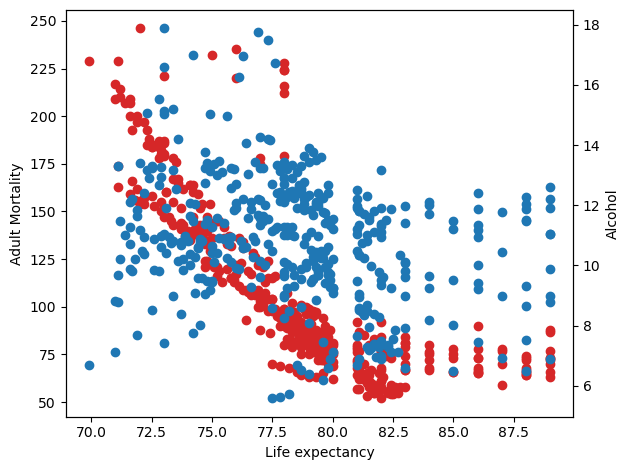

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Life expectancy')
ax1.set_ylabel('Adult Mortality')
ax1.plot(df_Smoking['Life expectancy'], df_Smoking['Adult Mortality'], color=color, linestyle ='None', marker='o')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Alcohol')
ax2.plot(df_Smoking['Life expectancy'], df_Smoking['Alcohol'], color=color, linestyle = 'None', marker='o')
fig.tight_layout()
plt.show()

## Aplicando una transformacion logaritmica:

In [38]:
Paises_set = set(df_Smoking['Country'])
for country in Paises_set:
    pais = df_Smoking.loc[df['Country'] == country]
    pais = pais.drop('Country', axis=1)
    for column in pais:
        pais[f'{column}_log'] = np.log10(pais[column])
        pais_log = pais.iloc[:,19:38]
    pais_log.replace([np.inf, -np.inf], np.nan, inplace=True)
    pais_log['Status_log'].fillna(0, inplace=True) # inplace=True produce que se modifique el propio dataframe
    pais_log['Under-five deaths_log'].fillna(0, inplace=True)
    
    X = pais_log.drop('Life expectancy_log',axis= 1) 
    y = pais_log['Life expectancy_log']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'{country}:')
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error:", mse)

    print("Intercept:", model.intercept_)
    for i in range(len(model.coef_)):
        pais_drop = pais_log.drop('Life expectancy_log', axis=1)
        print(f'{model.coef_[i]:.2f} : {pais_drop.columns[i]}')

    r2_score = model.score(X, y)
    print(f"R-squared value: {r2_score} \n")
    break

Spain:
Mean Squared Error: 0.002871972459479908
Intercept: -1.3454077911683886
0.94 : Year_log
-0.02 : Status_log
-0.64 : Adult Mortality_log
-0.18 : Alcohol_log
-0.12 : Total expenditure_log
1.55 : BMI_log
0.01 : Under-five deaths_log
0.06 : Percentage expenditure_log
-0.02 : GDP_log
0.00 : Population_log
-0.14 : Thinness 1-19 years_log
0.00 : Thinness 5-9 years_log
0.37 : Income composition of resources_log
-1.91 : Schooling_log
1.08 : Average temperature_log
0.64 : CO2 Emissions_log
-0.22 : Cholesterol_log
-0.13 : Smoking_log
R-squared value: -2.6691825922126324 



C:\Users\arche\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\arche\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Spain:
Percentage expenditure_log:
Slope: 18.89
Intercept: 64.48
Rvalue: 0.30
Pvalue: 0.26
Stderr: 16.27
Regression line: y=64.4818.89x, r=0.30


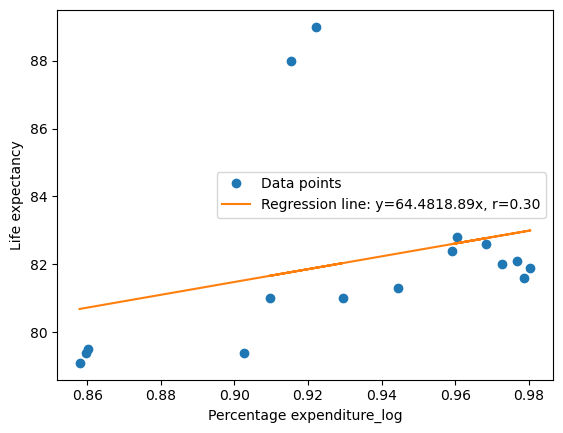

Cholesterol_log:
Slope: -48.43
Intercept: 108.11
Rvalue: -0.23
Pvalue: 0.40
Stderr: 55.88
Regression line: y=108.11-48.43x, r=-0.23


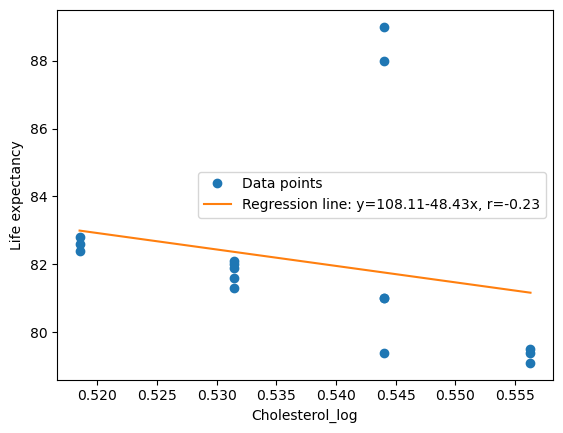

Income composition of resources_log:
Slope: 94.16
Intercept: 88.70
Rvalue: 0.35
Pvalue: 0.19
Stderr: 67.72
Regression line: y=88.7094.16x, r=0.35


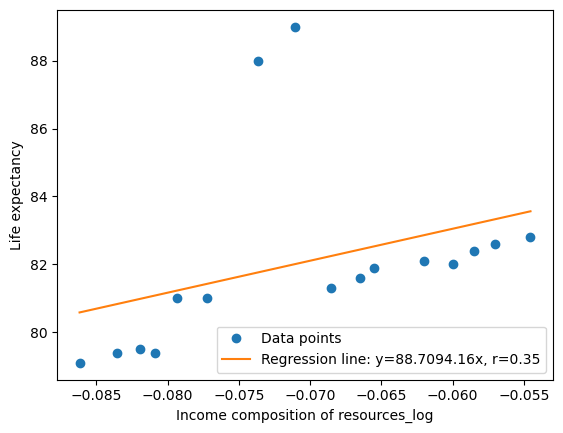

Population_log:
Slope: 0.14
Intercept: 81.06
Rvalue: 0.04
Pvalue: 0.89
Stderr: 1.04
Regression line: y=81.060.14x, r=0.04


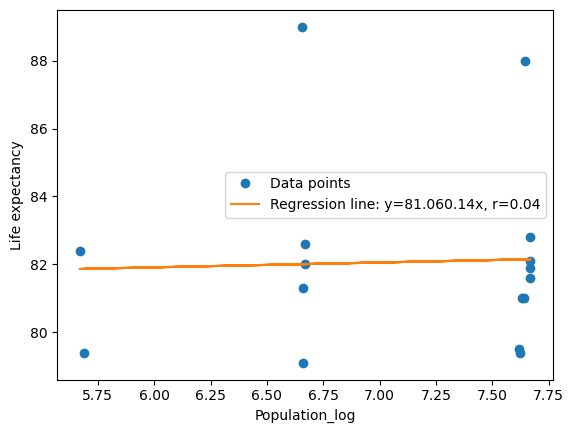

Alcohol_log:
Slope: -1.22
Intercept: 83.31
Rvalue: -0.02
Pvalue: 0.93
Stderr: 13.83
Regression line: y=83.31-1.22x, r=-0.02


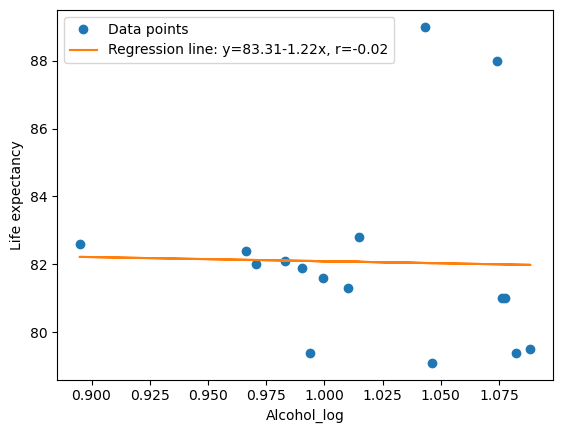

CO2 Emissions_log:
Slope: 0.95
Intercept: 81.28
Rvalue: 0.02
Pvalue: 0.93
Stderr: 11.01
Regression line: y=81.280.95x, r=0.02


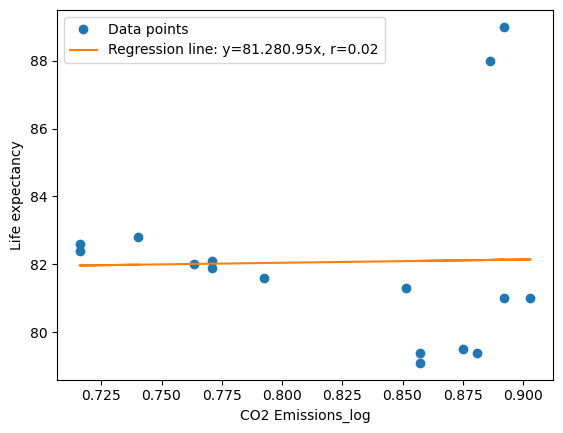

GDP_log:
Slope: -0.30
Intercept: 83.24
Rvalue: -0.07
Pvalue: 0.81
Stderr: 1.21
Regression line: y=83.24-0.30x, r=-0.07


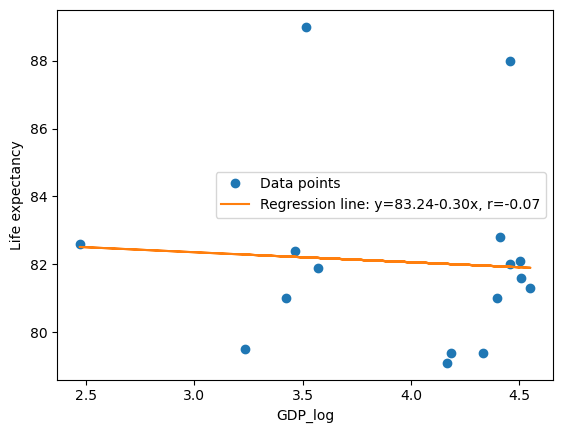

Smoking_log:
Slope: -9.02
Intercept: 95.68
Rvalue: -0.34
Pvalue: 0.19
Stderr: 6.62
Regression line: y=95.68-9.02x, r=-0.34


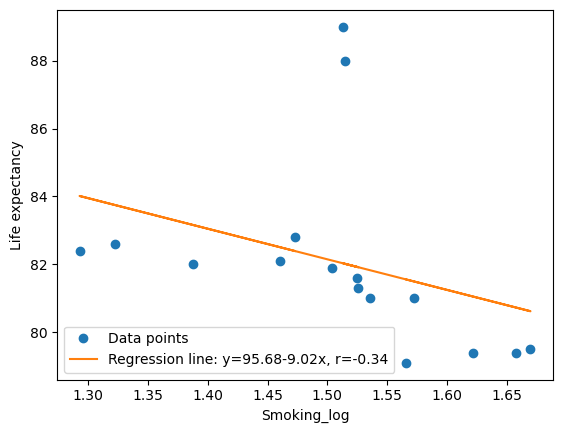

Schooling_log:
Slope: 25.85
Intercept: 50.71
Rvalue: 0.19
Pvalue: 0.49
Stderr: 36.54
Regression line: y=50.7125.85x, r=0.19


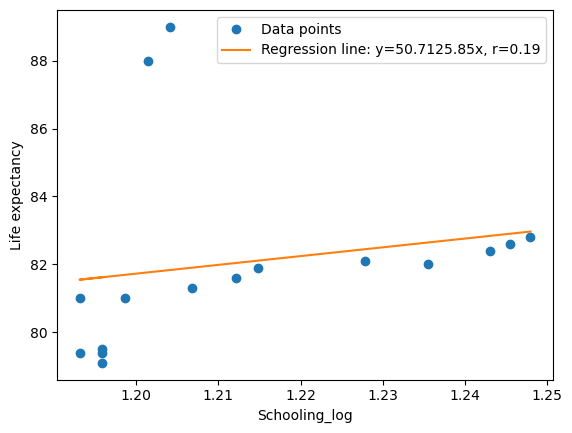

Total expenditure_log:
Slope: 8.86
Intercept: 52.62
Rvalue: 0.51
Pvalue: 0.04
Stderr: 3.96
Regression line: y=52.628.86x, r=0.51


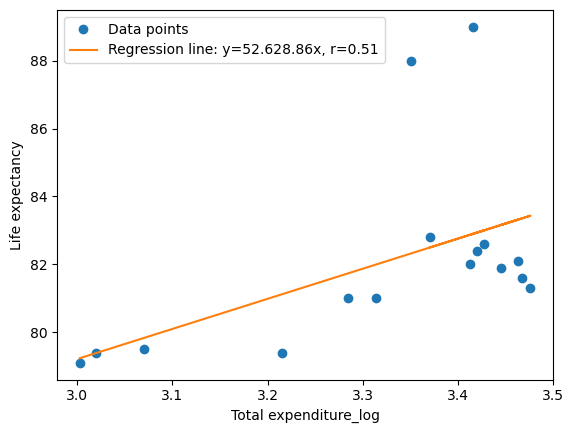

Adult Mortality_log:
Slope: -15.59
Intercept: 110.85
Rvalue: -0.33
Pvalue: 0.22
Stderr: 12.02
Regression line: y=110.85-15.59x, r=-0.33


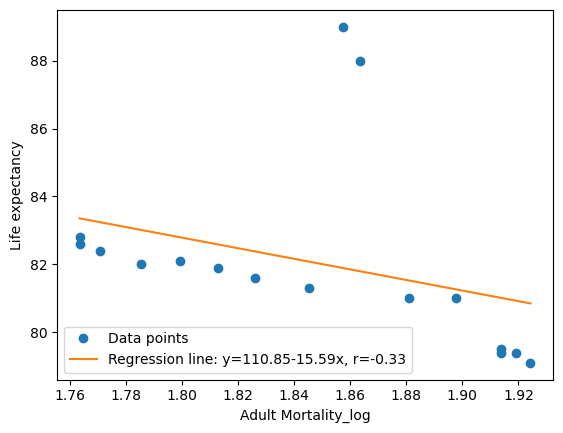

BMI_log:
Slope: 41.10
Intercept: 8.32
Rvalue: 0.30
Pvalue: 0.26
Stderr: 34.76
Regression line: y=8.3241.10x, r=0.30


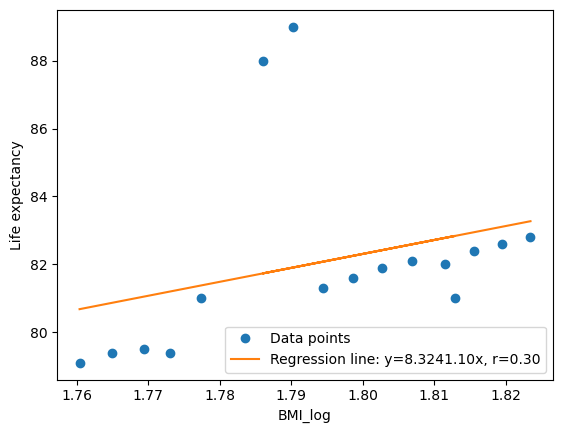

Life expectancy_log:
Slope: 193.22
Intercept: -287.75
Rvalue: 1.00
Pvalue: 0.00
Stderr: 0.97
Regression line: y=-287.75193.22x, r=1.00


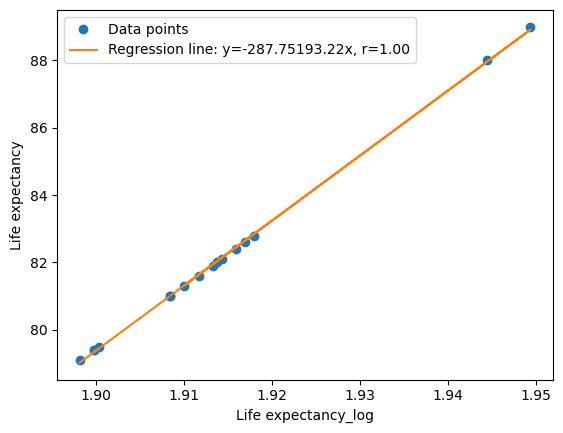

Year_log:
Slope: 937.21
Intercept: -3013.22
Rvalue: 0.35
Pvalue: 0.19
Stderr: 679.82
Regression line: y=-3013.22937.21x, r=0.35


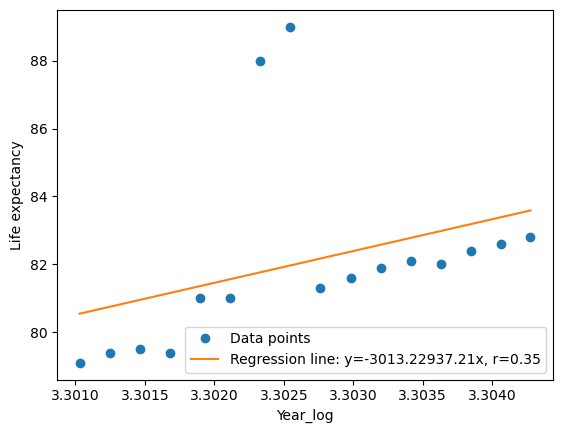

Under-five deaths_log:
Slope: -2.40
Intercept: 82.70
Rvalue: -0.09
Pvalue: 0.75
Stderr: 7.23
Regression line: y=82.70-2.40x, r=-0.09


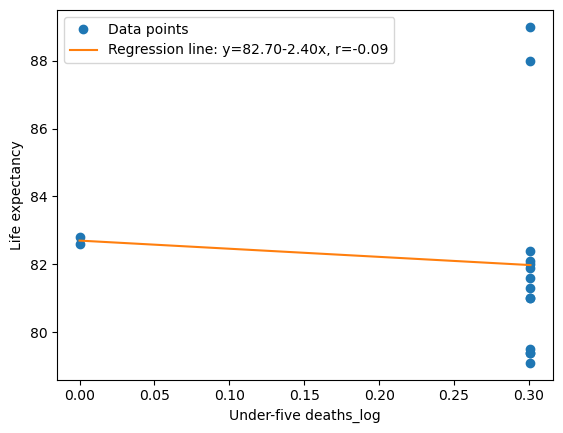

Average temperature_log:
Slope: 34.83
Intercept: 42.05
Rvalue: 0.13
Pvalue: 0.64
Stderr: 72.21
Regression line: y=42.0534.83x, r=0.13


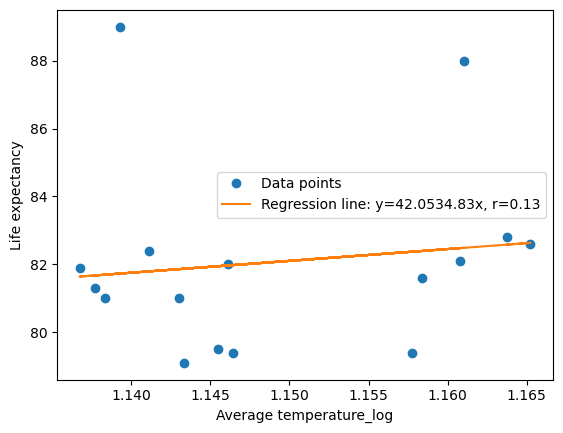

------------------------------------------------------------------- 



In [39]:
Paises_set = set(df_Smoking['Country'])
for country in Paises_set:
    pais = df_Smoking.loc[df['Country'] == country]
    pais = pais.drop('Country', axis=1)
    for column in pais:
        pais[f'{column}_log'] = np.log10(pais[column])
        pais_log = pais.iloc[:,19:38]
    pais_log.replace([np.inf, -np.inf], np.nan, inplace=True)
    pais_log['Status_log'].fillna(0, inplace=True) # inplace=True produce que se modifique el propio dataframe
    pais_log['Under-five deaths_log'].fillna(0, inplace=True)
    print(f'{country}:')
    variables_set = set(pais_log.columns)
    for variable in variables_set:
        if variable == "Life expectancy":
            pass
        else:
            X = pais[variable]
            y = pais['Life expectancy']

            if X.nunique() == 1:
                continue

            print(f'{variable}:')
            result = scipy.stats.linregress(X, y)
            print(f'Slope: {result.slope:.2f}')
            print(f'Intercept: {result.intercept:.2f}')
            print(f'Rvalue: {result.rvalue:.2f}')
            print(f'Pvalue: {result.pvalue:.2f}')
            print(f'Stderr: {result.stderr:.2f}')

            slope, intercept, r, p, stderr = scipy.stats.linregress(X, y)
            line = f'Regression line: y={intercept:.2f}{slope:.2f}x, r={r:.2f}'
            print(line)

            fig, ax = plt.subplots()
            ax.plot(X, y, linewidth=0, marker='o', label='Data points')
            ax.plot(X, intercept + slope * X, label=line)
            ax.set_xlabel(variable)
            ax.set_ylabel('Life expectancy')
            ax.legend(facecolor='white')
            plt.show()
    print('------------------------------------------------------------------- \n')
    break